In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import random
from scipy.special import gamma

In [2]:
####  测试函数集


# F1
# 每维度的取值范围[-100,100]
# 维度  20
from math import sqrt


def F1(x):
    sum=0.0
    for i in x:
        sum+=(i**2)
    return sum

# F2
# 每维度的取值范围[-100,100]
# 维度  20
def F2(x):
    sum=0.0
    for i in range(len(x)):
        tmp=0.0
        for j in range(i):
            tmp+=x[j]
        sum+=tmp**2

    return sum

# F3
# 每维度的取值范围[-100,100]
# 维度  20
def F3(x):
    return np.max(np.abs(x))

# F4
# 每维度的取值范围[-10,10]
# 维度  20
def F4(x):
    sum=0.0
    acc=1.0
    for i in x:
        sum+=np.abs(i)
        acc*=np.abs(i)
    return sum+acc

# F5
# 每维度的取值范围[-100,100]
# 维度  20
def F5(x):
    sum=0.0
    for i in x:
        sum+=(round(i+0.5)**2)
    return sum

# F6
# 每维度的取值范围[-1,1]
# 维度  20
def F6(x):
    sum=0.0
    for i in range(len(x)):
        sum+=math.pow(np.abs(x[i]),i+1)
    return sum

# F7
# 每维度的取值范围[-5,10]
# 维度  20
def F7(x):
    sum1=0.0
    sum2=0.0
    for i in range(len(x)):
        sum1+=(x[i]**2)
        sum2+=0.5*x[i]*i
    return sum1+sum2**2+sum2**4

# F8
# 每维度的取值范围[-5.12,5.12]
# 维度  20
def F8(x):
    sum1=0.0
    for i in range(len(x)):
        sum1+=(i*x[i]**2)
    return sum1

# F9
# 每维度的取值范围[-5.12,5.12]
# 维度  20
def F9(x):
    sum1=0.0
    for i in range(len(x)):
        sum1+=(x[i]**2-10*np.cos(2*np.pi*x[i])+10)
    return sum1

# F10
# 每维度的取值范围[-32,32]
# 维度  20
def F10(x):
    sum1=0.0
    sum2=0.0
    for i in range(len(x)):
        sum1+=(x[i]**2)
        sum2+=np.cos(2*np.pi*x[i]*x[i])
    
    return -20*np.exp((-0.2*np.sqrt(sum1/20)))-np.exp(0.05*sum2)+20+np.e

# F11
# 每维度的取值范围[-600,600]
# 维度  20
def F11(x):
    sum1=0.0
    sum2=1.0
    for i in range(len(x)):
        sum1+=(x[i]**2)
        sum2*=np.cos(x[i]/sqrt(i+1))
    
    return sum1/4000-sum2+1


# F12
# 每维度的取值范围[-512,512]
# 维度  2
# x[0]为x,x[1]为y
def F12(x):
    t1=sqrt(np.abs(x[1]+1-x[0]))
    t2=sqrt(np.abs(x[1]+1+x[0]))
    return x[0]*np.sin(t1)*np.cos(t2)+(x[1]+1)*np.cos(t1)*np.sin(t2)

# F13
# 每维度的取值范围[-5.12,5.12]
# 维度  2
# x[0]为x,x[1]为y
def F13(x):
    t=x[0]*x[0]+x[1]*x[1]
    return -(3/(0.05+t))**2-t**2

# F14
# 每维度的取值范围[-5,5]
# 维度  2
# x[0]为x,x[1]为y
def F14(x):
    t1=x[0]**4+x[1]**4
    t2=x[0]**2+x[1]**2
    t3=x[0]+x[1]
    return 0.5*(t1-16*t2+5*t3)

# F15
# 每维度的取值范围[-10,10]
# 维度  2
# x[0]为x,x[1]为y
def F15(x):
    t1=x[0]**2+x[1]**2
    return 0.26*t1-0.48*x[0]*x[1]


# F16
# 每维度的取值范围[-4.5,4.5]
# 维度  2
#
def F16(x):
    t1=1.5-x[0]+x[1]*x[0]
    t2=2.25-x[0]+x[1]**2*x[0]
    t3=2.625-x[0]+x[1]**3*x[0]
    return t1**2+t2**2+t3**2

# F17
# 每维度的取值范围[-10,10]
# 维度  2
#
def F17(x):
    return 1+np.sin(x[0])**2+np.sin(x[1])**2-0.1*np.exp(-(x[0]**2+x[1]**2))

# F18
# 每维度的取值范围[-10,10]
# 维度  2
#
def F18(x):
    s1=0.0
    s2=0.0
    for ii in range(5):
        i=ii+1
        s1+=i*(np.cos((i-1)*x[0])+1)
        s2+=i*(np.cos((i+1)*x[1])+1)
    return s1*s2+(x[0]+1.42513)**2+(x[1]+0.80032)**2


In [38]:

class BSA():
    def __init__(self,func_solve,N,ND,M,FQ,P,C,S,a1,a2,FL,lb,ub,on=False) -> None:
        self.func=func_solve
        self.N=N
        self.ND=ND
        self.M=M
        self.FQ=FQ
        self.P=P
        self.C=C
        self.S=S
        self.a1=a1
        self.a2=a2
        self.FL=FL
        self.pbest=[] # 保存每个个体历史最佳位置
        self.gbest=[] # 保存群体历史最佳位置
        self.lb=lb
        self.ub=ub
        self.history_best_Y=[]
        self.on=on

        self.pos=np.random.uniform(low=lb, high=ub, size=(self.N, self.ND)) # 记录每次迭代各个体的位置
        self.best_y=0


        self.avg_best=0
        




    def fitness(self):
        fit_val=[]
        for i in self.pos:
            fit_val.append(self.func(i))
        return np.array(fit_val)

    def findgbest(self,fit_val):
        index=np.argmin(fit_val)
        return self.pos[index]
    
    def updatebest(self,fit_val):
        for i in range(self.N):
            if self.func(self.pos[i])<self.func(self.pbest[i]):
                # 需要更新
                self.pbest[i]=self.pos[i]
        
        if np.min(fit_val)<self.func(self.gbest):
            self.gbest=self.pos[np.argmin(fit_val)]

    
    def levy(self):
        sigma=math.pow((gamma(2.5)*np.sin(np.pi*0.75)/(gamma(1.25)*1.5*math.pow(2,0.25))),2/3)

        for i in range(len(self.pos)):

            r1=np.random.randn(self.ND)
            r2=np.random.randn(self.ND)
            
            self.pos[i]=self.lb+(self.ub-self.lb)*r1*sigma/math.pow(np.linalg.norm(r2),2/3)

    
    def update_C_and_S(self):
        self.C-=2/self.M
        self.S+=2/self.M
        
    def run(self):
        t=0

        # 初始化
        # 已在init中对pos进行了初始化
        # 对初始种群进行评估
        fit_val=self.fitness()
        self.pbest=self.pos
        self.gbest=self.findgbest(fit_val)
        self.history_best_Y.append((np.min(fit_val)))
        while t<self.M:
            if t%self.FQ!=0:  
                # 没有找到食物
                # 鸟群还在飞行
                for i in range(self.N):
                    if random.random()<self.P:
                        ## 觅食
                        self.pos[i]=self.pos[i]+\
                        (self.pbest[i]-self.pos[i])*self.C*np.random.rand(self.ND)+\
                        (self.gbest-self.pos[i])*self.S*np.random.rand(self.ND)
                    else :
                        ## 保持警戒
                        sumvector=np.zeros(self.ND)
                        for item in self.pos:
                            sumvector+=item
                        meanj=sumvector/self.N
                        k=random.randint(0,self.N-1)
                        if k==i:
                            k=(k+1)%self.N
                            
                        sum=np.sum(fit_val)
                        eps=10e-8

                        #print(sum)
                        A1=self.a1*np.exp(-self.N*fit_val[i]/(sum+eps))
                        
                        if A1>10:
                            A1=10
                        A2=self.a2*np.exp((fit_val[i]-fit_val[k])*self.N*fit_val[i]/(np.abs(fit_val[i]-fit_val[k])+sum+eps))
                        
                        #print(f"分子为{(fit_val[i]-fit_val[k])*self.N*fit_val[i]},分母为{(np.abs(fit_val[i]-fit_val[k])+sum+eps)}")
                        if A2>10:
                            A2=10
                        # print(f"A1为{A1}")
                        # print(f"A2为{A2}")
                        self.pos[i]=self.pos[i]+\
                        (meanj-self.pos[i])*A1*np.random.rand(self.ND)+\
                        (self.pos[k]-self.pos[i])*A2*(2*np.random.rand(self.ND)-1)
            
            else :
                ## 找到了食物
                ## 划分为生产者和乞食者
                producer=[]
                scrounger=[]
                bestindex=np.argmin(fit_val)
                worstindex=np.argmax(fit_val)
                producer.append(bestindex)
                scrounger.append(worstindex)
                for i in range(self.N):
                    if i!=bestindex or i!=worstindex:
                        if random.random()<0.5:
                            producer.append(i)
                        else:
                            scrounger.append(i)

                for bird in producer:
                    self.pos[bird]=self.pos[bird]*(np.ones(self.ND)+np.random.randn(self.ND))

                for bird in scrounger:
                    self.pos[bird]=self.pos[bird]+(self.pos[bestindex]-self.pos[bird])*self.FL*np.random.rand(self.ND)
            ## 到此获得新的一代种群
            

            #检查是否存在超出给定范围的值
            for nbird in self.pos:
                #print(nbird)
                for d in range(self.ND):
                    # print(d)
                    # print(nbird[d])
                    # print(self.ub[d])
                    nbird[d]=nbird[d] if nbird[d] <self.ub[d] else self.ub[d]
                    nbird[d]=nbird[d] if nbird[d] >self.lb[d] else self.lb[d]


            fit_val=self.fitness()

            """
            如果需要调用run_manytimes，需要注释此处的提前退出条件
            可能导致hist_best维度不同出现错误
            """
        
            # if t>30 and np.abs(np.min(fit_val)-np.mean(self.history_best_Y[-20:]))<10e-20:
            #     break
            self.history_best_Y.append(np.min(fit_val))
            if self.on:
                self.update_C_and_S()
            #更新pbest，gbest
            self.updatebest(fit_val)


            ## 判断是否已经收敛
            t+=1

        self.best_y=np.min(self.history_best_Y)


    def run_manytimes(self):
        avg_hist_best=np.zeros(self.M)
        for i in range(30):
            self.run()
            avg_hist_best+=self.history_best_Y[:self.M]
            self.avg_best+=self.best_y
            self.history_best_Y=[]
            self.gbest=[]
            self.pbest=[]


        avg_hist_best=avg_hist_best/self.M
        self.avg_best=self.avg_best/self.M

        return avg_hist_best,self.avg_best



1.6653345369377347e-17


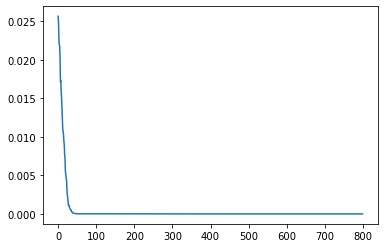

In [30]:
func_need_solve=F10
nd=20
lb=-32*np.ones(nd)
ub=32*np.ones(nd)
bsa=BSA(func_need_solve,N=50,ND=nd,M=800,FQ=3,P=0.9,C=1.5,S=1.5,a1=1,a2=1,FL=0.8,lb=lb,ub=ub)
l,a=bsa.run_manytimes()

print(a)
plt.plot(l)

In [102]:

## 从其他算法，如PSO，DE等算法
from sko.PSO import PSO
from sko.DE import DE


func_need_solve=F10
nd=20
lb=-32*np.ones(nd)
ub=32*np.ones(nd)

pso=PSO(func_need_solve,n_dim=nd,lb=lb,max_iter=2000,ub=ub,w=0.729,c1=1.49445,c2=1.49445)
pso.run()
de=DE(func_need_solve,nd,F=0.6,prob_mut=0.9,lb=lb,ub=ub,max_iter=2000)
de.run()
bsa=BSA(func_need_solve,N=50,ND=nd,M=2000,FQ=3,P=0.9,C=1.5,S=1.5,a1=1,a2=1,FL=0.8,lb=lb,ub=ub)
bsa.run()

In [103]:
print(len(pso.gbest_y_hist))
print(len(de.generation_best_Y))
print(len(bsa.history_best_Y))

print(pso.best_y)
print(de.best_y)
print(bsa.best_y)

2000
2000
252
[19.9609228]
[3.99680289e-15]
3.9968028886505635e-15


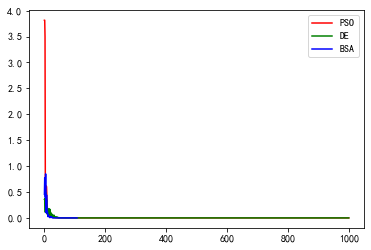

In [86]:
#plt.cla()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

fig=plt.figure()
plt.plot(pso.gbest_y_hist,'r',label="PSO")
plt.plot(de.generation_best_Y,'g',label="DE")
plt.plot(bsa.history_best_Y,'b',label="BSA")
plt.legend()

#plt.savefig("F10的曲线")

# 此Markdown单元格用于记录求得的最优值
## 前面几个函数最小值不为0的原因是设置了提前退出的阈值
## 当这一次与之前的20次的差距不足10e-10时退出
F1   8.993545653299736e-12
F2   8.516877611855528e-11
F3   3.477512364390343e-10
F4   1.7197647148095475e-10
F5   0.0
F6   3.740887124637084e-24
F7   2.4185537905168297e-20
F8   4.9447061698310023e-23
F9   0.0
F10  15.181083062331139  // 大问题
F11  0.0
F12  -511.7318052628272
F13  -3600.0
F14  -78.33230881015902
F15  5.655726204830158e-25
F16  3.7596099175887733e-06
F17  0.9
F18  35.5683594055847  // 其他两个算法也是类似的结果
150
200
1501
[35.56833667]
[35.56833667]
35.5683594055847

In [4]:
func_need_solve=F5
nd=20
lb=-100*np.ones(nd)
ub=100*np.ones(nd)

C:\Users\12752\AppData\Local\Temp\ipykernel_6756\8897037.py:97: RuntimeWarning: overflow encountered in exp
  A2=self.a2*np.exp((fit_val[i]-fit_val[k])*self.N*fit_val[i]/(np.abs(fit_val[i]-fit_val[k])+sum+eps))


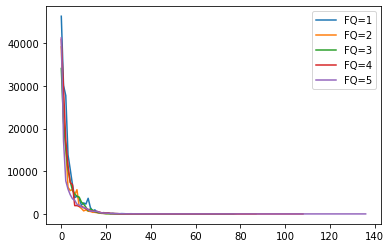

In [5]:
## 对FQ的调参

from matplotlib.pyplot import legend


for fq in range(1,6):
    bsa=BSA(func_need_solve,N=50,ND=nd,M=1500,FQ=fq,P=0.9,C=1.5,S=1.5,a1=1,a2=1,FL=0.8,lb=lb,ub=ub)
    bsa.run()
    plt.plot(bsa.history_best_Y,label=f"FQ={fq}")

plt.legend()

In [ ]:
## 对FL的调参
for fl in np.linspace(0.5,0.9,5):
    bsa=BSA(func_need_solve,N=50,ND=nd,M=1500,FQ=3,P=0.9,C=1.5,S=1.5,a1=1,a2=1,FL=fl,lb=lb,ub=ub)
    bsa.run()
    plt.plot(bsa.history_best_Y,label=f"FL={fl}")

plt.legend()

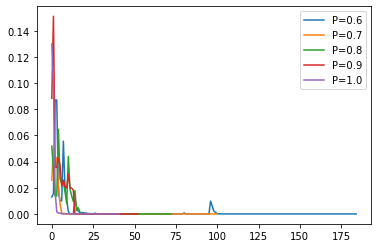

In [48]:
## 对P的调参
func_need_solve=F11
for p in np.linspace(0.6,1,5):
    bsa=BSA(func_need_solve,N=50,ND=nd,M=1500,FQ=3,P=p,C=1.5,S=1.5,a1=1,a2=1,FL=fl,lb=lb,ub=ub)
    l,a=bsa.run_manytimes()
    plt.plot(l,label=f"P={p}")

plt.legend()

不使用levy的迭代次数0,最佳答案为0.9
使用levy的迭代次数0,最佳答案为0.9


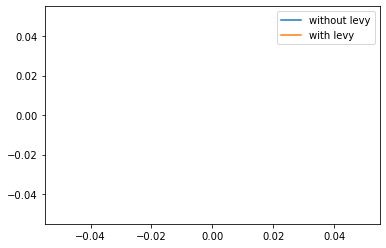

In [31]:
## levy优化
func_need_solve=F17
nd=2
lb=-10*np.ones(nd)
ub=10*np.ones(nd)

bsa1=BSA(func_need_solve,N=50,ND=nd,M=1000,FQ=3,P=0.9,C=1.5,S=1.5,a1=1,a2=1,FL=0.8,lb=lb,ub=ub)
bsa1.run_manytimes()

plt.plot(bsa1.history_best_Y,label="without levy")


bsa2=BSA(func_need_solve,N=50,ND=nd,M=1000,FQ=3,P=0.9,C=1.5,S=1.5,a1=1,a2=1,FL=0.8,lb=lb,ub=ub)
bsa2.levy()

bsa2.run_manytimes()
plt.plot(bsa2.history_best_Y,label="with levy")

plt.legend()

print(f"不使用levy的迭代次数{len(bsa1.history_best_Y)},最佳答案为{bsa1.best_y}")
print(f"使用levy的迭代次数{len(bsa2.history_best_Y)},最佳答案为{bsa2.best_y}")

不使用线性学习因子的迭代次数1501,最佳答案为0.9
使用线性学习因子的迭代次数46,最佳答案为0.9


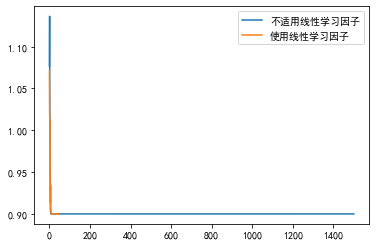

In [12]:
## 学习因子
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

func_need_solve=F17
nd=2
lb=-10*np.ones(nd)
ub=10*np.ones(nd)

bsa1=BSA(func_need_solve,N=50,ND=nd,M=1500,FQ=3,P=0.9,C=1.5,S=1.5,a1=1,a2=1,FL=0.8,lb=lb,ub=ub,on=False)
bsa1.run()

plt.plot(bsa1.history_best_Y,label="不适用线性学习因子")


bsa2=BSA(func_need_solve,N=50,ND=nd,M=1500,FQ=3,P=0.9,C=1.5,S=1.5,a1=1,a2=1,FL=0.8,lb=lb,ub=ub,on=True)

bsa2.run()
plt.plot(bsa2.history_best_Y,label="使用线性学习因子")

plt.legend()

print(f"不使用线性学习因子的迭代次数{len(bsa1.history_best_Y)},最佳答案为{bsa1.best_y}")
print(f"使用线性学习因子的迭代次数{len(bsa2.history_best_Y)},最佳答案为{bsa2.best_y}")